**TASK**

1.	计算用户的0-3天、3-7天、7-15天、>15天这几个时间段的留存率
2.	用图表的形式表示不同时间长度的留存率

**说明**:

1. 留存率：用户在一个平台上首次购买以后多少天内还进行了第二次购买的比例
2. 7天留存率：用户在一个平台上首次购买以后7天内又进行了第二次购买的用户数与首次购买用户数的比值

**业务背景**

一个平台的用户数量由两个因素决定，一个是能进来多少用户，另一个是进来的这些用户有多少可以留下来，用留存率这个指标来评判留下来的情况

**计算逻辑说明**

计算用户不同购买时间与首次购买时间的时间差，不同时间差内的客户数量与首次购买的所有客户数量的比值即为该时间差的留存率

In [21]:
import pandas as pd
df = pd.read_excel('56.xlsx',encoding = "utf-8")
df.head()

,SDate,ShopID,SheetID,STime,CashValue,Payvalue,DisValue,MemberID,Age,Sex,Profession
0,20170405,CDLG,20170405CDLG000310112469,2017-04-05 18:30:39,9.320,9.7,0.0,6920159990D24,35,男,03木材、森林业
1,20170405,CDLG,20170405CDLG000310112470,2017-04-05 18:34:00,47.146,68.3,4.4,692013349548A,28,女,19治安人员
2,20170405,CDLG,20170405CDLG000310112473,2017-04-05 18:36:51,26.396,28.1,0.0,6920123856355,16,女,07建筑工程业（土木工程）
3,20170405,CDLG,20170405CDLG000310112477,2017-04-05 18:44:24,100.140,105.2,43.7,692016804819A,44,女,14公共事业
4,20170405,CDLG,20170405CDLG000310112480,2017-04-05 18:46:38,6.520,6.9,2.0,692016696915B,40,男,11娱乐业


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
SDate         22223 non-null int64
ShopID        22223 non-null object
SheetID       22223 non-null object
STime         22223 non-null datetime64[ns]
CashValue     22223 non-null float64
Payvalue      22223 non-null float64
DisValue      22223 non-null float64
MemberID      22223 non-null object
Age           22223 non-null int64
Sex           22223 non-null object
Profession    13913 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 1.9+ MB


In [23]:
#获取用户的首次购买时间
first_b = df.sort_values(by = "STime",ascending = True).drop_duplicates("MemberID")

In [24]:
first_b.shape

(4200, 11)

In [25]:
lc = pd.merge(first_b,df,on = "MemberID",how = "inner")

In [26]:
lc.head()

,SDate_x,ShopID_x,SheetID_x,STime_x,CashValue_x,Payvalue_x,DisValue_x,MemberID,Age_x,Sex_x,...,SDate_y,ShopID_y,SheetID_y,STime_y,CashValue_y,Payvalue_y,DisValue_y,Age_y,Sex_y,Profession_y
0,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,20170410,CDLG,20170410CDLG000910103163,2017-04-10 06:28:13,46.756,52.7,4.2,51,女,NaN
1,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,20170410,CDLG,20170410CDLG000910103167,2017-04-10 06:55:12,7.900,14.8,0.0,51,女,NaN
2,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,20170418,CDLG,20170418CDLG000710042553,2017-04-18 06:20:50,44.529,45.1,0.0,51,女,NaN
3,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,20170418,CDLG,20170418CDLG000710042556,2017-04-18 06:29:23,16.920,17.4,1.7,51,女,NaN
4,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,20170418,CDLG,20170418CDLG000710042568,2017-04-18 06:46:58,4.950,5.2,0.0,51,女,NaN


In [27]:
lc["cha"] = lc["STime_y"] - lc["STime_x"]

In [28]:
lc["cha_num"] = [d.days for d in lc["cha"]]
lc["cha_bin"] = pd.cut(lc["cha_num"],bins = [0,3,7,15,100])
lc.head(2)

,SDate_x,ShopID_x,SheetID_x,STime_x,CashValue_x,Payvalue_x,DisValue_x,MemberID,Age_x,Sex_x,...,STime_y,CashValue_y,Payvalue_y,DisValue_y,Age_y,Sex_y,Profession_y,cha,cha_num,cha_bin
0,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,2017-04-10 06:28:13,46.756,52.7,4.2,51,女,NaN,9 days 00:18:15,9,"(7, 15]"
1,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,2017-04-10 06:55:12,7.900,14.8,0.0,51,女,NaN,9 days 00:45:14,9,"(7, 15]"


In [29]:
#help(pd.pivot_table)
#lc['cha_bin']

In [30]:
lc.head()

,SDate_x,ShopID_x,SheetID_x,STime_x,CashValue_x,Payvalue_x,DisValue_x,MemberID,Age_x,Sex_x,...,STime_y,CashValue_y,Payvalue_y,DisValue_y,Age_y,Sex_y,Profession_y,cha,cha_num,cha_bin
0,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,2017-04-10 06:28:13,46.756,52.7,4.2,51,女,NaN,9 days 00:18:15,9,"(7, 15]"
1,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,2017-04-10 06:55:12,7.900,14.8,0.0,51,女,NaN,9 days 00:45:14,9,"(7, 15]"
2,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,2017-04-18 06:20:50,44.529,45.1,0.0,51,女,NaN,17 days 00:10:52,17,"(15, 100]"
3,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,2017-04-18 06:29:23,16.920,17.4,1.7,51,女,NaN,17 days 00:19:25,17,"(15, 100]"
4,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.0,6920088765037,51,女,...,2017-04-18 06:46:58,4.950,5.2,0.0,51,女,NaN,17 days 00:37:00,17,"(15, 100]"


In [31]:
help(lc.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.') method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order of arguments for Series was changed.
    
    Parameters
    ----------
    path_or_buf : str or file handle, default None
        File path or object, if None is provided the result is returned as
        a string.  If a file object is passed it should be opened with
        `newline=''`, disabling universal newlines.
    
        .. versionchanged:: 0.24.0
    
           Was previously named "path" for Series.
    
    sep : str, default ','
        String of l

In [32]:
#lc.to_csv('lc.csv',encoding ='gbk')

In [36]:
lc= pd.read_csv('lc.csv',encoding = 'gbk')

In [37]:
pd.pivot_table(lc,index = 'MemberID',columns ='cha_bin',values = 'CashValue_y')
#aa=pd.pivot_table(lc,index = "MemberID",columns ="cha_bin",values = "CashValue_y")

cha_bin,"(0.0, 3.0]","(15.0, 100.0]","(3.0, 7.0]","(7.0, 15.0]"
MemberID,,,,
6919994159793,31.612000,NaN,NaN,45.049000
6919994444D02,NaN,8.182000,NaN,NaN
6919994963123,NaN,NaN,NaN,56.024000
6919996654EFE,NaN,NaN,24.0400,15.123000
69199966686A6,NaN,NaN,NaN,11.774000
6919996692B94,NaN,NaN,NaN,2.994000
6919996699BAC,NaN,33.728000,34.5920,1.827000
69199967378DD,NaN,14.620000,NaN,44.993333
6919996804B82,NaN,NaN,NaN,13.470000


In [38]:
df2 = pd.pivot_table(lc,index = "MemberID",columns = "cha_bin",values = "CashValue_x").applymap(lambda x:1 if x > 0 else 0)

In [39]:
df2.head()

cha_bin,"(0.0, 3.0]","(15.0, 100.0]","(3.0, 7.0]","(7.0, 15.0]"
MemberID,,,,
6919994159793,1,0,0,1
6919994444D02,0,1,0,0
6919994963123,0,0,0,1
6919996654EFE,0,0,1,1
69199966686A6,0,0,0,1


In [40]:
df2.sum()

cha_bin
(0.0, 3.0]       1226
(15.0, 100.0]    1976
(3.0, 7.0]       1597
(7.0, 15.0]      2053
dtype: int64

In [41]:
df2.count()

cha_bin
(0.0, 3.0]       2950
(15.0, 100.0]    2950
(3.0, 7.0]       2950
(7.0, 15.0]      2950
dtype: int64

In [42]:
df2.sum()/df2.count()

cha_bin
(0.0, 3.0]       0.415593
(15.0, 100.0]    0.669831
(3.0, 7.0]       0.541356
(7.0, 15.0]      0.695932
dtype: float64

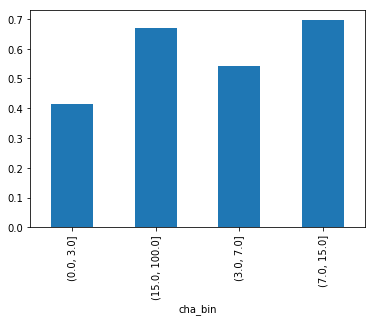

In [44]:
%matplotlib inline
(df2.sum()/df2.count()).plot(kind = "bar")

In [45]:
d1 = pd.DataFrame([[1,"a"],["2","b"]],columns = ["col1","col2"])
d1

,col1,col2
0,1,a
1,2,b


In [46]:
d2 = pd.DataFrame([[1,"a"],["2","b"],["2","c"]],columns = ["col1","col3"])
d2

,col1,col3
0,1,a
1,2,b
2,2,c


In [47]:
pd.merge(d1,d2)

,col1,col2,col3
0,1,a,a
1,2,b,b
2,2,b,c
